In [5]:
import numpy as np
import pandas as pd
import tensorflow.contrib.layers as lays
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from skimage import transform
from matplotlib import pyplot as plt

In [6]:
def autoencoder(inputs):
    # encoder
    # 32 x 32 x 1   ->  16 x 16 x 32
    # 16 x 16 x 32  ->  8 x 8 x 16
    # 8 x 8 x 16    ->  2 x 2 x 8
    net = lays.conv2d(inputs, 32, [5, 5], stride=2, padding='SAME')
    net = lays.conv2d(net, 16, [5, 5], stride=2, padding='SAME')
    net = lays.conv2d(net, 8, [5, 5], stride=4, padding='SAME')
    # decoder
    # 2 x 2 x 8    ->  8 x 8 x 16
    # 8 x 8 x 16   ->  16 x 16 x 32
    # 16 x 16 x 32  ->  32 x 32 x 1
    net = lays.conv2d_transpose(net, 16, [5, 5], stride=4, padding='SAME')
    net = lays.conv2d_transpose(net, 32, [5, 5], stride=2, padding='SAME')
    net = lays.conv2d_transpose(net, 1, [5, 5], stride=2, padding='SAME', activation_fn=tf.nn.tanh)
    return net


def resize_batch(imgs):
    # A function to resize a batch of MNIST images to (32, 32)
    # Args:
    #   imgs: a numpy array of size [batch_size, 28 X 28].
    # Returns:
    #   a numpy array of size [batch_size, 32, 32].
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return resized_imgs

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


/home/molly/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Epoch: 1 - cost= 0.10042
Epoch: 1 - cost= 0.10053
Epoch: 1 - cost= 0.09805
Epoch: 1 - cost= 0.10108
Epoch: 1 - cost= 0.09631
Epoch: 1 - cost= 0.09740
Epoch: 1 - cost= 0.09318
Epoch: 1 - cost= 0.09480
Epoch: 1 - cost= 0.09043
Epoch: 1 - cost= 0.08770
Epoch: 1 - cost= 0.08609
Epoch: 1 - cost= 0.07845
Epoch: 1 - cost= 0.07514
Epoch: 1 - cost= 0.07536
Epoch: 1 - cost= 0.07996
Epoch: 1 - cost= 0.07753
Epoch: 1 - cost= 0.07134
Epoch: 1 - cost= 0.06945
Epoch: 1 - cost= 0.06776
Epoch: 1 - cost= 0.06766
Epoch: 1 - cost= 0.06723
Epoch: 1 - cost= 0.06905
Epoch: 1 - cost= 0.06606
Epoch: 1 - cost= 0.06607
Epoch: 1 - cost= 0.06363
Epoch: 1 - cost= 0.06318
Epoch: 1 - cost= 0.06360
Epoch: 1 - cost= 0.06205
Epoch: 1 - cost= 0.06391
Epoch: 1 - cost= 0.06157
Epoch: 1 - cost= 0.06099
Epoch: 1 - cost= 0.05938
Epoch: 1 - cost= 0.05871
Epoch: 1 - cost= 0.05805
Epoch: 1 - cost= 0.05645
Epoch: 1 - cost= 0.05627
Epoch: 1 - cost= 0.05702
Epoch: 1 - cost= 0.05673
Epoch: 1 - cost= 0.05559
Epoch: 1 - cost= 0.05444


Epoch: 3 - cost= 0.01111
Epoch: 3 - cost= 0.01125
Epoch: 4 - cost= 0.01143
Epoch: 4 - cost= 0.01103
Epoch: 4 - cost= 0.01107
Epoch: 4 - cost= 0.01124
Epoch: 4 - cost= 0.01170
Epoch: 4 - cost= 0.01110
Epoch: 4 - cost= 0.01114
Epoch: 4 - cost= 0.01121
Epoch: 4 - cost= 0.01087
Epoch: 4 - cost= 0.01118
Epoch: 4 - cost= 0.01124
Epoch: 4 - cost= 0.01119
Epoch: 4 - cost= 0.01081
Epoch: 4 - cost= 0.01099
Epoch: 4 - cost= 0.01079
Epoch: 4 - cost= 0.01173
Epoch: 4 - cost= 0.01104
Epoch: 4 - cost= 0.01111
Epoch: 4 - cost= 0.01078
Epoch: 4 - cost= 0.01083
Epoch: 4 - cost= 0.01066
Epoch: 4 - cost= 0.01083
Epoch: 4 - cost= 0.01066
Epoch: 4 - cost= 0.01073
Epoch: 4 - cost= 0.01082
Epoch: 4 - cost= 0.01072
Epoch: 4 - cost= 0.01093
Epoch: 4 - cost= 0.01112
Epoch: 4 - cost= 0.01127
Epoch: 4 - cost= 0.01113
Epoch: 4 - cost= 0.01076
Epoch: 4 - cost= 0.01072
Epoch: 4 - cost= 0.01061
Epoch: 4 - cost= 0.01108
Epoch: 4 - cost= 0.01058
Epoch: 4 - cost= 0.01101
Epoch: 4 - cost= 0.01039
Epoch: 4 - cost= 0.01133


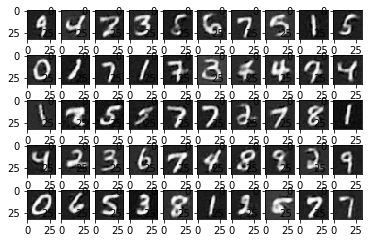

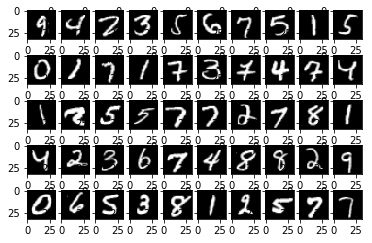

In [7]:
ae_inputs = tf.placeholder(tf.float32, (None, 32, 32, 1))  # input to the network (MNIST images)
ae_outputs = autoencoder(ae_inputs)  # create the Autoencoder network
# calculate the loss and optimize the network
loss = tf.reduce_mean(tf.square(ae_outputs - ae_inputs))  # claculate the mean square error loss
train_op = tf.train.AdamOptimizer().minimize(loss)
# initialize the network
init = tf.global_variables_initializer()

batch_size = 500  # Number of samples in each batch
epoch_num = 5     # Number of epochs to train the network
lr = 0.001        # Learning rate

# read MNIST dataset
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

# calculate the number of batches per epoch
batch_per_ep = mnist.train.num_examples // batch_size

with tf.Session() as sess:
    sess.run(init)
    for ep in range(epoch_num):  # epochs loop
        for batch_n in range(batch_per_ep):  # batches loop
            batch_img, batch_label = mnist.train.next_batch(batch_size)  # read a batch
            batch_img = batch_img.reshape((-1, 28, 28, 1)) # reshape each sample to an (28, 28) image
            batch_img = resize_batch(batch_img) # reshape the images to (32, 32)
            _, c = sess.run([train_op, loss], feed_dict={ae_inputs: batch_img})
            print('Epoch: {} - cost= {:.5f}'.format((ep + 1), c))

    # test the trained network
    batch_img, batch_label = mnist.test.next_batch(50)
    batch_img = resize_batch(batch_img)
    recon_img = sess.run([ae_outputs], feed_dict={ae_inputs: batch_img})[0]
    
    # test the trained network
    batch_img, batch_label = mnist.test.next_batch(50)
    batch_img = resize_batch(batch_img)
    recon_img = sess.run([ae_outputs], feed_dict={ae_inputs: batch_img})[0]

    # plot the reconstructed images and their ground truths (inputs)
    plt.figure(1)
    plt.title('Reconstructed Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(recon_img[i, ..., 0], cmap='gray')
    plt.figure(2)
    plt.title('Input Images')
    for i in range(50):
        plt.subplot(5, 10, i+1)
        plt.imshow(batch_img[i, ..., 0], cmap='gray')
    plt.show()